# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [259]:
# Define major and minor tick locators
years = mdates.YearLocator()  # Major locator: every year
years_fmt = mdates.DateFormatter('%Y')  # Format: display years
months = mdates.MonthLocator()  # Minor locator: every month

In [183]:
# Create locators for ticks on the time axis

print(years) 
print(months) 
print(years_fmt) 

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [184]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')


# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [185]:
df_tesla.shape


(124, 3)

In [186]:
df_tesla.head()


,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [187]:
# min search is 2
df_tesla.sort_values('TSLA_WEB_SEARCH',ascending=True)


,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
3,2010-09-01,2,4.082000
2,2010-08-01,2,3.896000
5,2010-11-01,2,7.066000
4,2010-10-01,2,4.368000
6,2010-12-01,2,5.326000
...,...,...,...
116,2020-02-01,23,133.598007
122,2020-08-01,23,498.320007
121,2020-07-01,24,286.152008
113,2019-11-01,30,65.987999


In [188]:
print(f"Smallest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.min()}")


Smallest value for Tesla in Web Search: 2


In [189]:
# max search is 31
df_tesla.sort_values('TSLA_WEB_SEARCH',ascending=False)


,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
123,2020-09-01,31,407.339996
113,2019-11-01,30,65.987999
121,2020-07-01,24,286.152008
116,2020-02-01,23,133.598007
122,2020-08-01,23,498.320007
...,...,...,...
18,2011-12-01,2,5.712000
12,2011-06-01,2,5.826000
15,2011-09-01,2,4.878000
2,2010-08-01,2,3.896000


In [190]:
print(f"Largest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.max()}")



Largest value for Tesla in Web Search: 31


In [191]:
df_tesla.columns


Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')

In [192]:
df_tesla.describe()


,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


### Bitcoin

In [193]:
df_btc_search.shape


(73, 2)

In [194]:
df_btc_search.columns


Index(['MONTH', 'BTC_NEWS_SEARCH'], dtype='object')

In [195]:
df_btc_search.head()


,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [196]:
print(f'largest BTC News Search: {df_btc_search.BTC_NEWS_SEARCH.max()} ')


largest BTC News Search: 100 


In [197]:
df_btc_search.describe()


,BTC_NEWS_SEARCH
count,73.000000
mean,15.013699
std,15.146959
min,3.000000
25%,5.000000
50%,14.000000
75%,18.000000
max,100.000000


In [198]:
df_btc_price.shape


(2204, 3)

In [199]:
df_btc_price.columns


Index(['DATE', 'CLOSE', 'VOLUME'], dtype='object')

In [200]:
df_btc_price.head()


,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [201]:
df_btc_price.describe()


,CLOSE,VOLUME
count,2203.000000,2.203000e+03
mean,4429.421245,8.043622e+09
std,4148.150071,1.176529e+10
min,178.102997,5.914570e+06
25%,433.629502,6.029915e+07
50%,3637.520020,2.018890e+09
75%,7997.372803,1.322478e+10
max,19497.400391,7.415677e+10


### Unemployment Data

In [202]:
df_unemployment.shape


(181, 3)

In [203]:
df_unemployment.columns


Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')

In [204]:
df_unemployment.head()


,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [205]:
df_unemployment.describe()


,UE_BENEFITS_WEB_SEARCH,UNRATE
count,181.000000,181.000000
mean,35.110497,6.217680
std,20.484925,1.891859
min,14.000000,3.700000
25%,21.000000,4.700000
50%,26.000000,5.400000
75%,45.000000,7.800000
max,100.000000,10.000000


In [206]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment.UE_BENEFITS_WEB_SEARCH.max()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


## We can see from our DataFrames that Google's search interest ranges between 0 and 100. 

### Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.

#### For each word in your search, Google finds how much search volume in each region and time period your term had relative to all the searches in that region and time period. It then combines all of these measures into a single measure of popularity, and then it scales the values across your topics, so the largest measure is set to 100. In short: Google Trends doesn’t exactly tell you how many searches occurred for your topic, but it does give you a nice proxy.


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [207]:
df_tesla.isnull().sum()

MONTH              0
TSLA_WEB_SEARCH    0
TSLA_USD_CLOSE     0
dtype: int64

In [208]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')

Missing values for Tesla?: False


In [209]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.sum()}')

Missing values for Tesla?: 0


In [210]:
df_btc_search.isnull().sum()

MONTH              0
BTC_NEWS_SEARCH    0
dtype: int64

In [211]:
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')

Missing values for BTC Search?: False


In [212]:
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.sum()}')

Missing values for BTC Search?: 0


In [213]:
df_btc_price.isnull().sum()

DATE      0
CLOSE     1
VOLUME    1
dtype: int64

In [214]:
print(f'Missing values for BTC Search?: {df_btc_price.isna().values.any()}')

Missing values for BTC Search?: True


In [215]:
print(f'Missing values for BTC Search?: {df_btc_price.isna().values.sum()}')

Missing values for BTC Search?: 2


#### Above shows that there are 2 missing values.

In [216]:
df_btc_price[df_btc_price.CLOSE.isna()]

,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


### To remove a missing value we can use .dropna(). 
### The inplace argument allows to overwrite our DataFrame and means we don't have to write:

In [217]:
# drop null records

df_btc_price=df_btc_price.dropna()

# or

df_btc_price.dropna(inplace=True)

In [218]:
# null records have been removed
print(f'Missing values for BTC Search?: {df_btc_price.isna().values.sum()}')

Missing values for BTC Search?: 0


In [219]:
df_unemployment.isnull().sum()

MONTH                     0
UE_BENEFITS_WEB_SEARCH    0
UNRATE                    0
dtype: int64

In [220]:
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')

Missing values for U/E?: False


In [221]:
print(f'Missing values for U/E?: {df_unemployment.isna().values.sum()}')

Missing values for U/E?: 0


### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [222]:
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [223]:
df_tesla['MONTH']=pd.to_datetime(df_tesla['MONTH'])

In [224]:
# MONTH has been modified as Date field
print(df_tesla.dtypes)

MONTH              datetime64[ns]
TSLA_WEB_SEARCH             int64
TSLA_USD_CLOSE            float64
dtype: object


In [225]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [226]:
df_btc_search['MONTH']=pd.to_datetime(df_btc_search['MONTH'])

In [227]:
print(df_btc_search.dtypes)

MONTH              datetime64[ns]
BTC_NEWS_SEARCH             int64
dtype: object


In [228]:
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [229]:
df_btc_price['DATE']=pd.to_datetime(df_btc_price['DATE'])

In [230]:
print(df_btc_price.dtypes)

DATE      datetime64[ns]
CLOSE            float64
VOLUME           float64
dtype: object


In [231]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [232]:
df_unemployment['MONTH']=pd.to_datetime(df_unemployment['MONTH'])

In [233]:
print(df_unemployment.dtypes)

MONTH                     datetime64[ns]
UE_BENEFITS_WEB_SEARCH             int64
UNRATE                           float64
dtype: object


### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>


Next, we have to think about how to make our Bitcoin price and our Bitcoin search volume comparable. Our Bitcoin price is daily data, but our Bitcoin Search Popularity is monthly data.

To convert our daily data into monthly data, we're going to use the .resample() function. The only things we need to specify is which column to use (i.e., our DATE column) and what kind of sample frequency we want (i.e., the "rule"). We want a monthly frequency, so we use 'M'.  If you ever need to resample a time series to a different frequency, you can find a list of different options here (for example 'Y' for yearly or 'T' for minute).

#### After resampling, we need to figure out how the data should be treated. 
#### In our case, we want the last available price of the month - the price at month-end.

In [234]:
df_btc_monthly = df_btc_price.resample('ME', on='DATE').last()

If we wanted the average price over the course of the month, we could use something like:

df_btc_monthly = df_btc_price.resample('M', on='DATE').mean()

In [235]:
df_btc_monthly.head()

,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


### Data Frames
#### 1. df_tesla 
#### 2. df_btc_search 
#### 3. df_btc_monthly
#### 4. df_unemployment

# Data Visualization

### Notebook Formatting & Style Helpers

In [236]:
# Create locators for ticks on the time axis

In [237]:
# Register date converters to avoid warning messages

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. 

In [238]:
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


**Challenge**: Make the chart larger and easier to read. 
1. Increase the figure size (e.g., to 14 by 8). 
2. Increase the font sizes for the labels and the ticks on the x-axis to 14. 
3. Rotate the text on the x-axis by 45 degrees. 
4. Make the lines on the chart thicker. 
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html). 
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html). 
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

How to add tick formatting for dates on the x-axis. 

**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price. 
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  

In [248]:
print(df_tesla.dtypes)

MONTH              datetime64[ns]
TSLA_WEB_SEARCH             int64
TSLA_USD_CLOSE            float64
dtype: object


In [265]:
# Month column
print(df_tesla.MONTH)

0     2010-06-01
1     2010-07-01
2     2010-08-01
3     2010-09-01
4     2010-10-01
         ...    
119   2020-05-01
120   2020-06-01
121   2020-07-01
122   2020-08-01
123   2020-09-01
Name: MONTH, Length: 124, dtype: datetime64[ns]


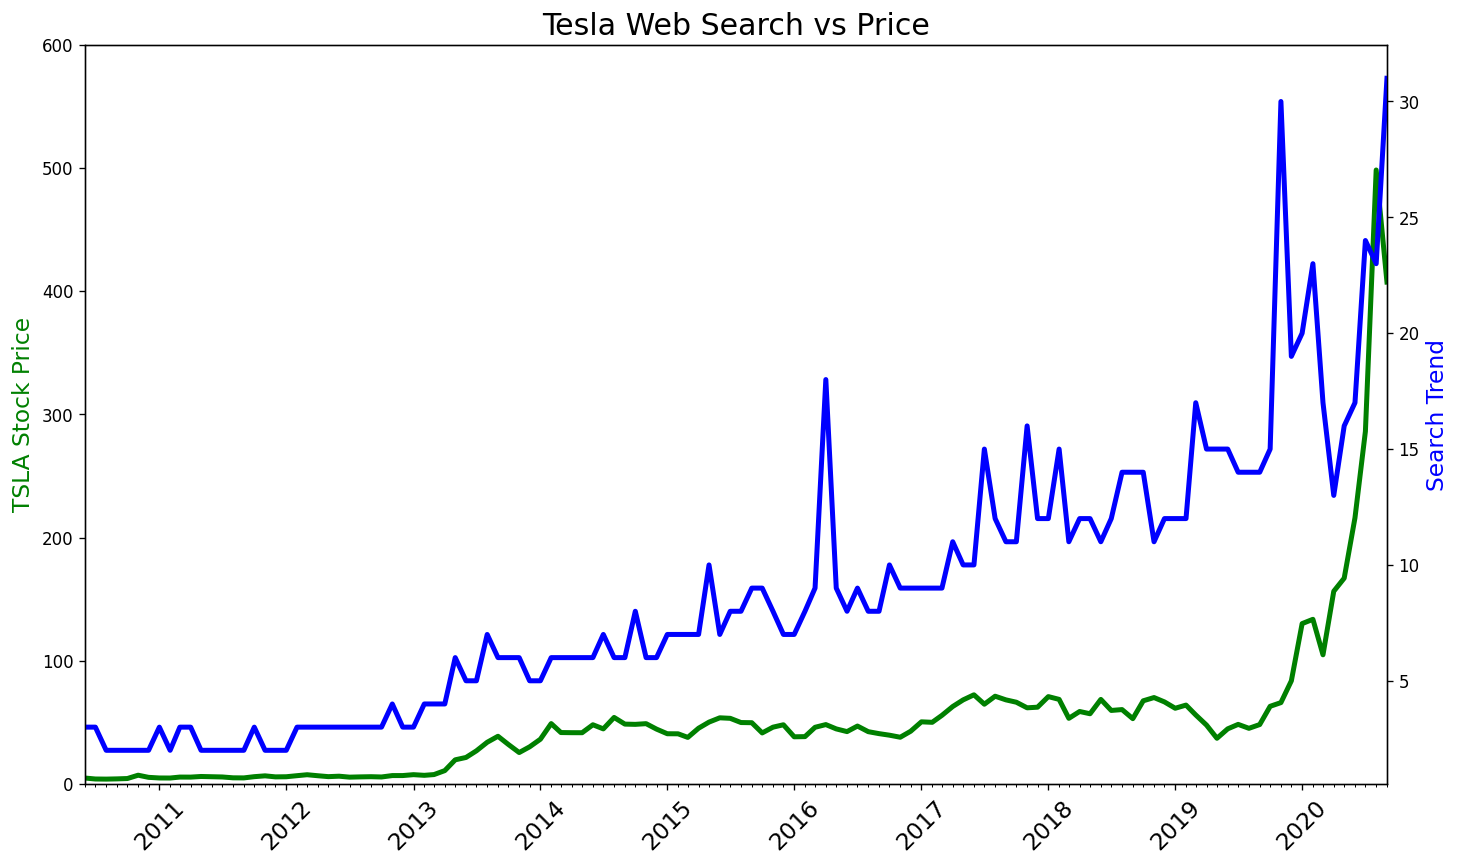

In [257]:
# increase size and resolution
plt.figure(figsize=(14,8), dpi=120)
plt.title('Tesla Web Search vs Price', fontsize=18)


# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca() # get current axis
ax2 = ax1.twinx()

ax1.set_ylabel('TSLA Stock Price', color='g', fontsize=14)
ax2.set_ylabel('Search Trend',color='b', fontsize=14)

# Set the minimum and maximum values on the axes
ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

# Format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE,color='g', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='b', linewidth=3)

plt.show()


#### Now we can go back to our chart and format where the major and minor ticks should be using the Locators.

## When we take a look at our chart, we can see the tick marks nicely. The tick marks also allow us to visually date that spike of interest in the middle of the chart - March 2016. This was when the Tesla Model 3 was unveiled. Also, we can clearly see that the most recent spikes in search coincide, not with the release of a new car, but the roaring stock price for the company!

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

In [241]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09-01,5
1,2014-10-01,4
2,2014-11-01,4
3,2014-12-01,4
4,2015-01-01,5


In [242]:
df_btc_monthly.head()

,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


In [264]:
# index is the date
df_btc_monthly.index

DatetimeIndex(['2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
      

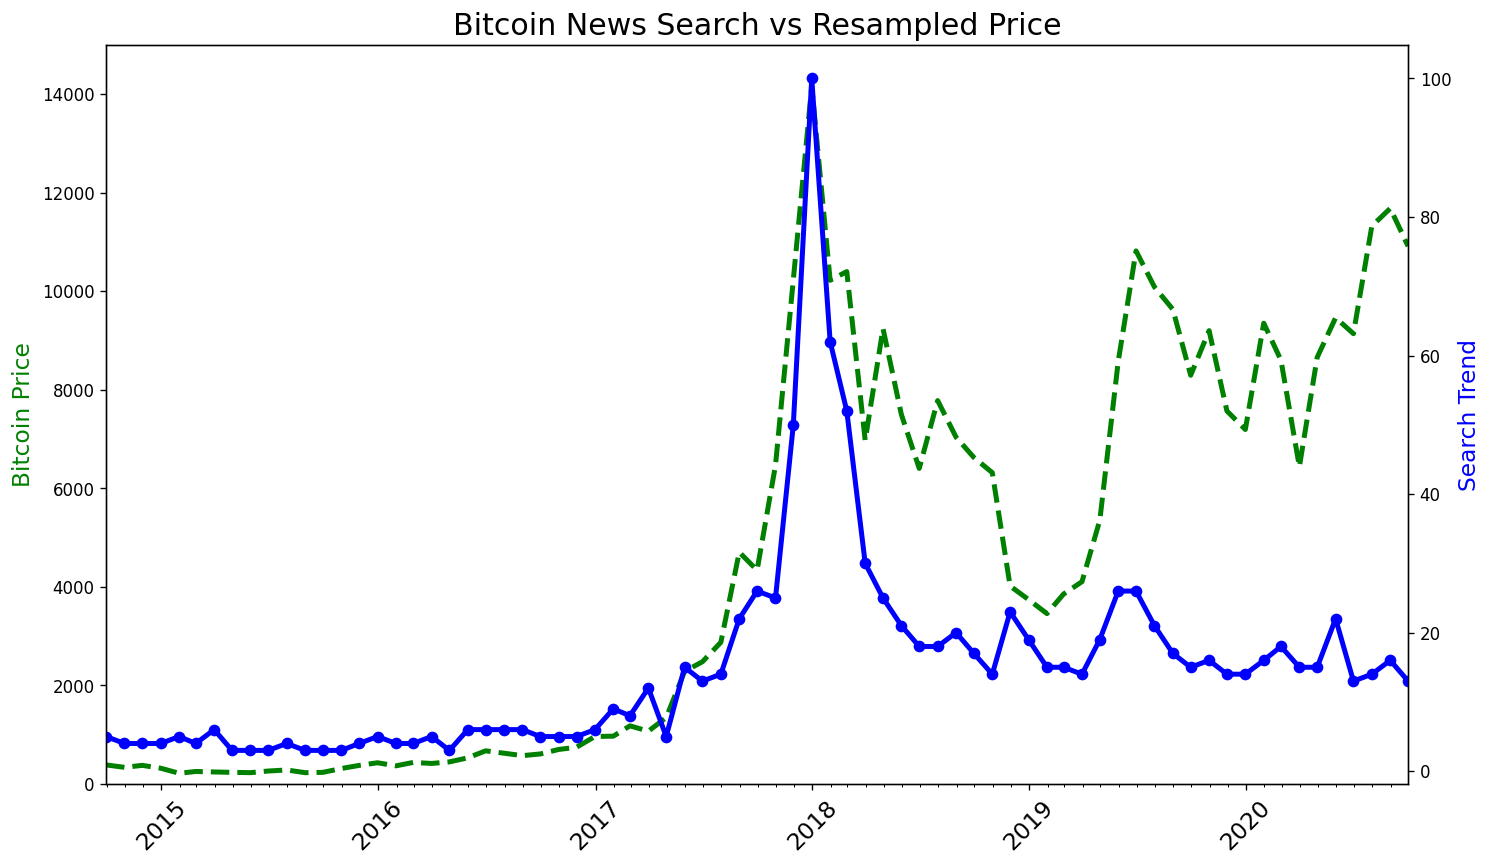

In [266]:
# increase size and resolution
plt.figure(figsize=(14,8), dpi=120)
plt.title('Bitcoin News Search vs Resampled Price', fontsize=18)


# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca() # get current axis
ax2 = ax1.twinx()

ax1.set_ylabel('Bitcoin Price', color='g', fontsize=14)
ax2.set_ylabel('Search Trend',color='b', fontsize=14)

# Format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)


# Set the minimum and maximum values on the axes
ax1.set_ylim([0, 15000])
ax1.set_xlim([df_btc_monthly.index.min(), df_btc_monthly.index.max()])

# Experiment with the linestyle and markers
ax1.plot(df_btc_monthly.index, df_btc_monthly.CLOSE,color='g', linewidth=3, linestyle='--')
ax2.plot(df_btc_monthly.index, df_btc_search.BTC_NEWS_SEARCH, color='b', linewidth=3, marker='o')

plt.show()

#### The main trick with this challenge involved substituting a different set of dates. The months of the time series are found in the index of the monthly bitcoin prices: df_btc_monthly.index.

In [268]:
print(df_btc_monthly.index)  # Should be a DatetimeIndex
print(df_btc_search.index)   # Check if it's also a DatetimeIndex
print(df_btc_search.dtypes)  # Check if 'MONTH' is datetime64

DatetimeIndex(['2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
      

#### What we see in the chart is that similar to Tesla, the crazy price movements in the beginning of 2018 are associated with very high search volumes. 

#### Everyone was talking about (and buying) Bitcoin in late 2017/early 2018 so search volumes were at a record high!  Interestingly, there was quite a huge spike in bitcoin prices in Q1 of 2019, but this time the increase in search volume was much less pronounced (perhaps because at this point everyone knew what Bitcoin was).

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

In [269]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,34,5.7
1,2004-02-01,33,5.6
2,2004-03-01,25,5.8
3,2004-04-01,29,5.6
4,2004-05-01,23,5.6


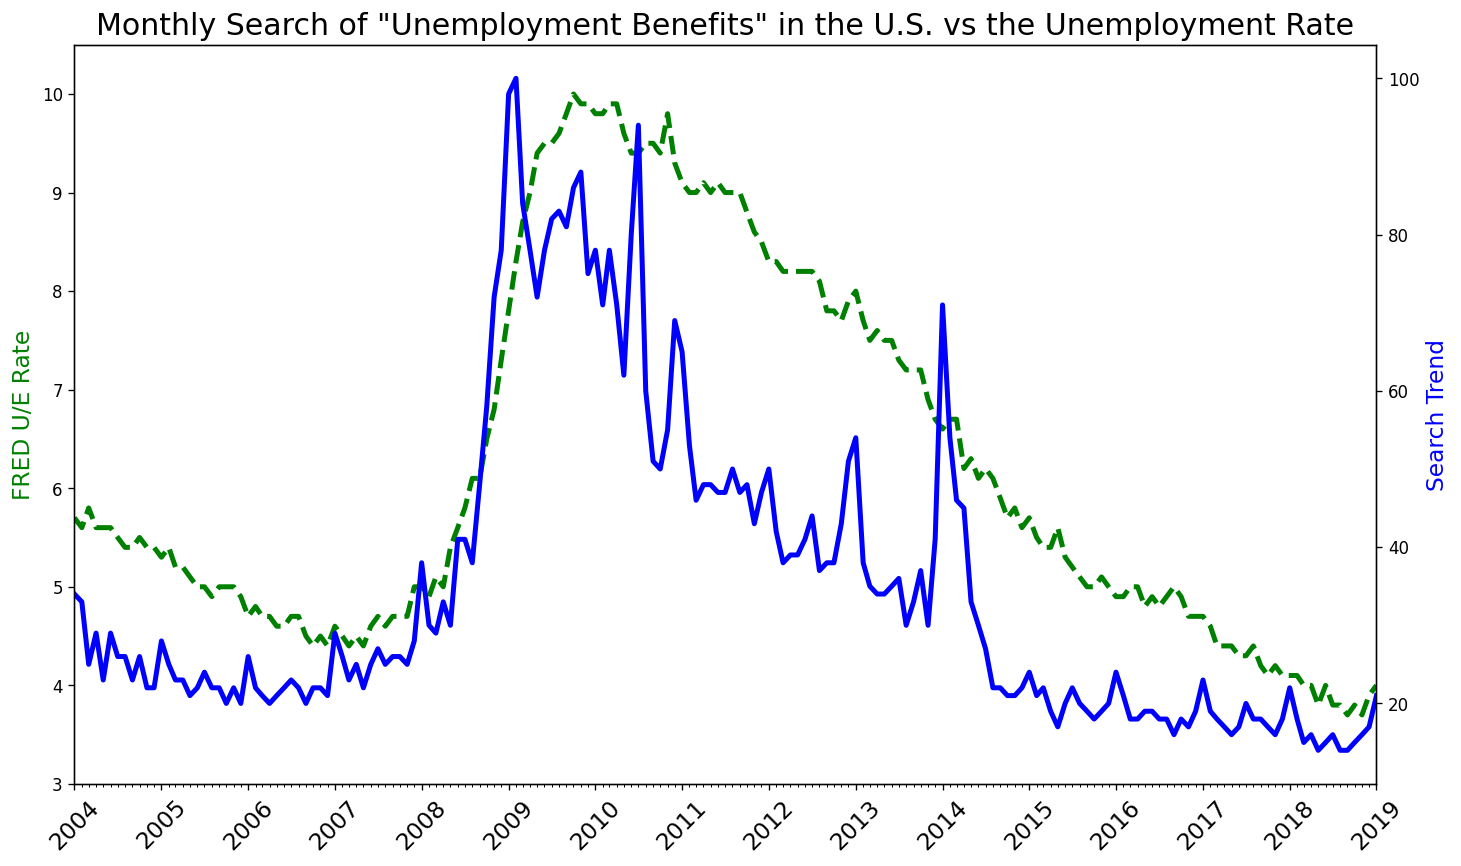

In [277]:
# increase size and resolution
plt.figure(figsize=(14,8), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the Unemployment Rate', fontsize=18)


# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca() # get current axis
ax2 = ax1.twinx()

ax1.set_ylabel('FRED U/E Rate', color='g', fontsize=14)
ax2.set_ylabel('Search Trend',color='b', fontsize=14)

# Format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)


# Set the minimum and maximum values on the axes
# If no real-world unemployment rate is below 3%, this setting improves readability without distortion.
ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

# Experiment with the linestyle and markers
ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE,color='g', linewidth=3, linestyle='--')
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, color='b', linewidth=3)

plt.show()

#### Notice how we can now clearly see the vertical dashed lines line up with spikes in searches for "Unemployment benefits". Many of the spikes are at year-end - in December. This clearly shows that there is seasonality in the job market. What else do we see? We see that the financial crisis in 2007/2008 caused a massive spike in unemployment. It took around 10 years (2007-2017) for the unemployment to reach the same level it had before the crisis.

#### Interestingly the big spike in searches for Unemployment benefits at the end of 2013 was not accompanied by a big increase in the unemployment rate. Something else must have been going on around that time.

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


In [279]:
# Calculate the rolling average over a 6 month window
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()
roll_df.tail()

,UE_BENEFITS_WEB_SEARCH,UNRATE
176,14.833333,3.850000
177,14.666667,3.816667
178,15.000000,3.800000
179,15.333333,3.783333
180,16.166667,3.816667


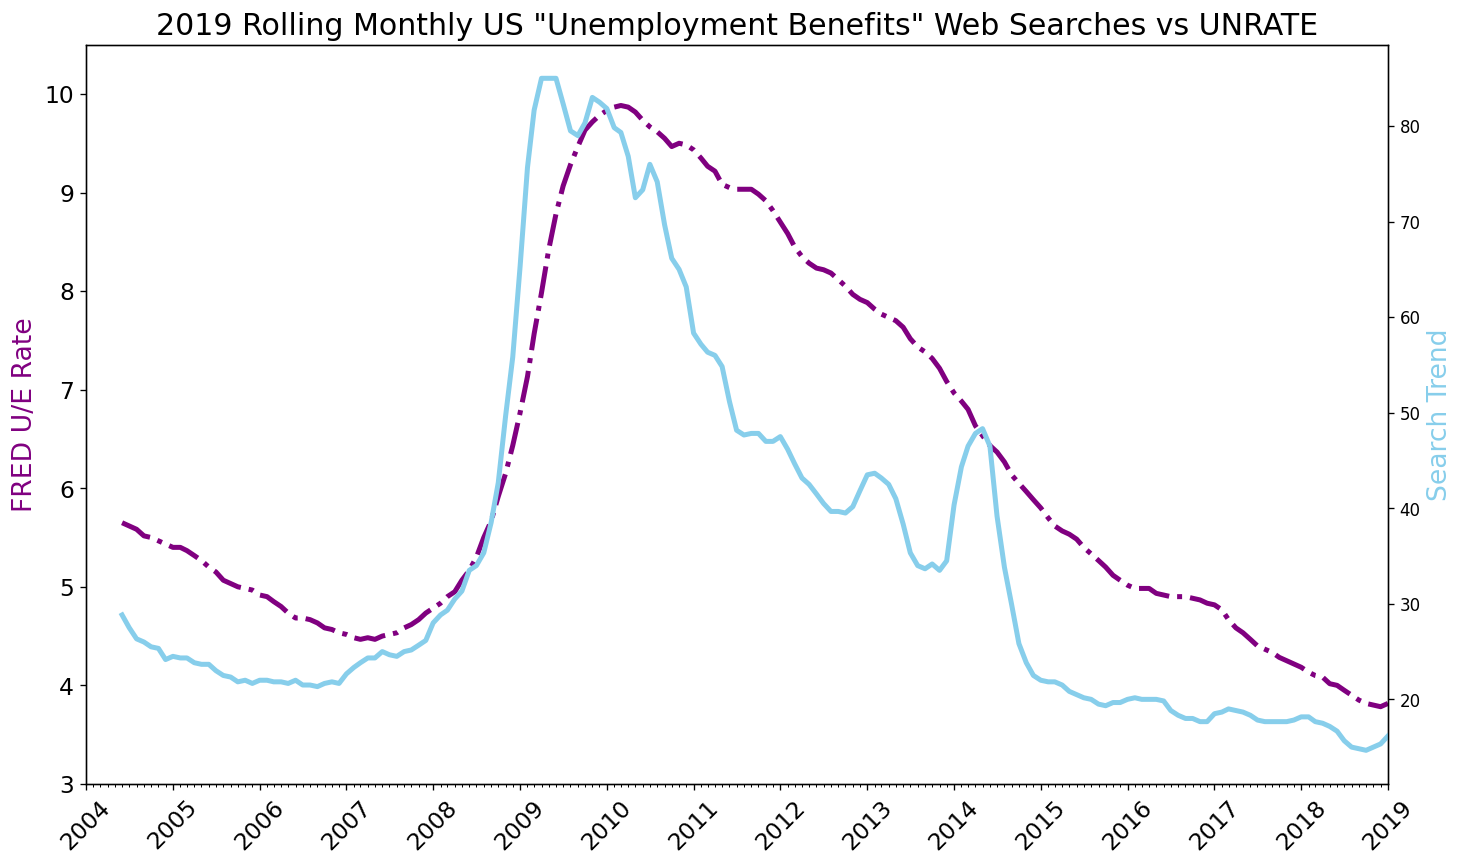

In [291]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('2019 Rolling Monthly US "Unemployment Benefits" Web Searches vs UNRATE', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)

ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

# Calculate the rolling average over a 6 month window
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

ax1.plot(df_unemployment.MONTH, roll_df.UNRATE, 'purple', linewidth=3, linestyle='-.')
ax2.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=3)

plt.show()

### What is this telling us? We see that searches for "Unemployment Benefits" happen before the actual official unemployment rate goes up. Similarly, the search popularity for the term goes down before the unemployment rate decreases. In other words, these searches seem to act as a leading economic indicator for the unemployment rate (which is a lagging indicator).

### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [283]:
df_unemployment_20 = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')
df_unemployment_20.tail()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
195,2020-04,100,14.7
196,2020-05,63,13.3
197,2020-06,53,11.1
198,2020-07,54,10.2
199,2020-08,50,8.4


In [286]:
df_unemployment_20['MONTH']=pd.to_datetime(df_unemployment_20['MONTH'])
print(df_unemployment_20.MONTH.dtype)

datetime64[ns]


In [287]:
df_unemployment_20.tail()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
195,2020-04-01,100,14.7
196,2020-05-01,63,13.3
197,2020-06-01,53,11.1
198,2020-07-01,54,10.2
199,2020-08-01,50,8.4


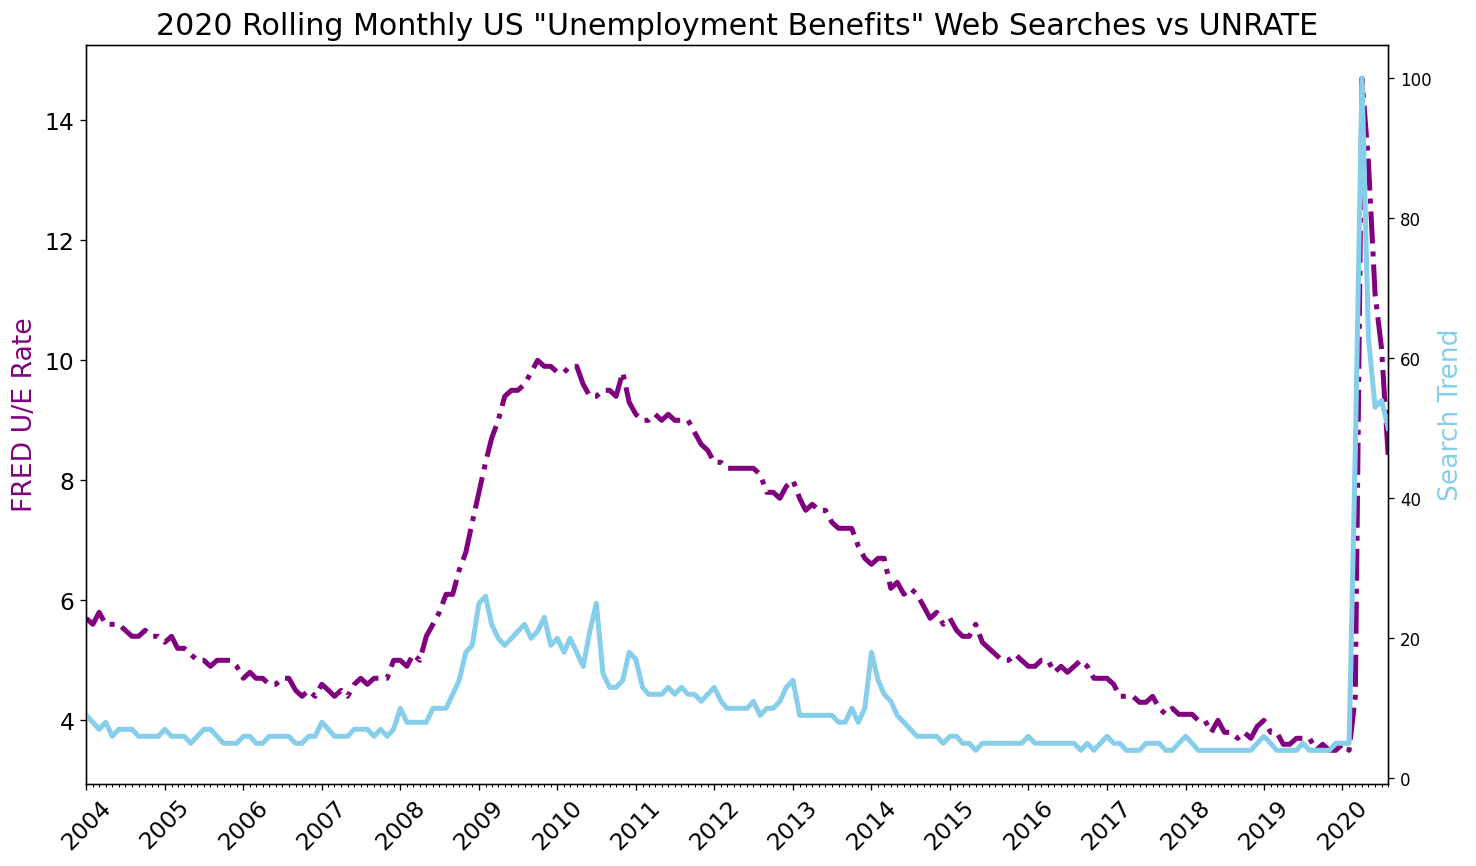

In [293]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('2020 Rolling Monthly US "Unemployment Benefits" Web Searches vs UNRATE', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)

ax1.set_xlim([df_unemployment_20.MONTH.min(), df_unemployment_20.MONTH.max()])

ax1.plot(df_unemployment_20.MONTH, df_unemployment_20.UNRATE, 'purple', linewidth=3, linestyle='-.')
ax2.plot(df_unemployment_20.MONTH, df_unemployment_20.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=3)

plt.show()

### What we see is not pretty. The US unemployment rate spiked to unprecedented levels during the COVID pandemic, dwarfing the levels seen during the financial crisis. Let's hope the recovery will be swifter this time.

## Learning Points & Summary
### In this lesson we looked at how to:

#### How to use .describe() to quickly see some descriptive statistics at a glance.

#### How to use .resample() to make a time-series data comparable to another by changing the periodicity.

How to work with matplotlib.dates Locators to better style a timeline (e.g., an axis on a chart).

How to find the number of NaN values with .isna().values.sum()

How to change the resolution of a chart using the figure's dpi

How to create dashed '--' and dotted '-.' lines using linestyles

How to use different kinds of markers (e.g., 'o' or '^') on charts.

Fine-tuning the styling of Matplotlib charts by using limits, labels, linewidth and colours (both in the form of named colours and HEX codes).

Using .grid() to help visually identify seasonality in a time series.

